In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import os

In [4]:
os.chdir(r"D:\1.Work\WorkStation\WorkSpace\Projects\Customer-Churn-Prediction")  # Set the working directory to the project folder to avoid issues with file paths
cwd = os.getcwd()
rawdata_path = os.path.join(cwd, "data", "raw",'data.csv')

In [5]:
'''
from ucimlrepo import fetch_ucirepo 

# fetch dataset 
iranian_churn = fetch_ucirepo(id=563) 
  
# data (as pandas dataframes) 
data = iranian_churn.data.original
data.to_csv(file_path)
'''

data = pd.read_csv(rawdata_path)

In [6]:
data.head()
data.drop(columns='Unnamed: 0',inplace=True)

In [7]:
data.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [8]:
data.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'Churn'],
      dtype='object')

In [9]:
data.info()
# No null values present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [10]:
data.shape

(3150, 14)

In [11]:
data.describe()


,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


In [12]:
# No Null values
data.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [13]:
data.nunique()

Call  Failure                37
Complains                     2
Subscription  Length         45
Charge  Amount               11
Seconds of Use             1756
Frequency of use            242
Frequency of SMS            405
Distinct Called Numbers      92
Age Group                     5
Tariff Plan                   2
Status                        2
Age                           5
Customer Value             2654
Churn                         2
dtype: int64

In [14]:
# No duplicate values
data.duplicated().sum()
data.drop_duplicates(inplace=True)

In [15]:
# Looking at the distribution of the target variable 'Churn'
# As the data is almost 50% balanced, any kind of classifier can be used
# Will be using Random Forest and XGBoost Model 
data['Churn'].value_counts()

Churn
0    2404
1     446
Name: count, dtype: int64

# EDA

## Univariate Analysis

In [16]:
num_cols = [i for i in data.columns if data[i].dtype in ['int64','float64','int32','float32']]
num_cols

['Call  Failure',
 'Complains',
 'Subscription  Length',
 'Charge  Amount',
 'Seconds of Use',
 'Frequency of use',
 'Frequency of SMS',
 'Distinct Called Numbers',
 'Age Group',
 'Tariff Plan',
 'Status',
 'Age',
 'Customer Value',
 'Churn']

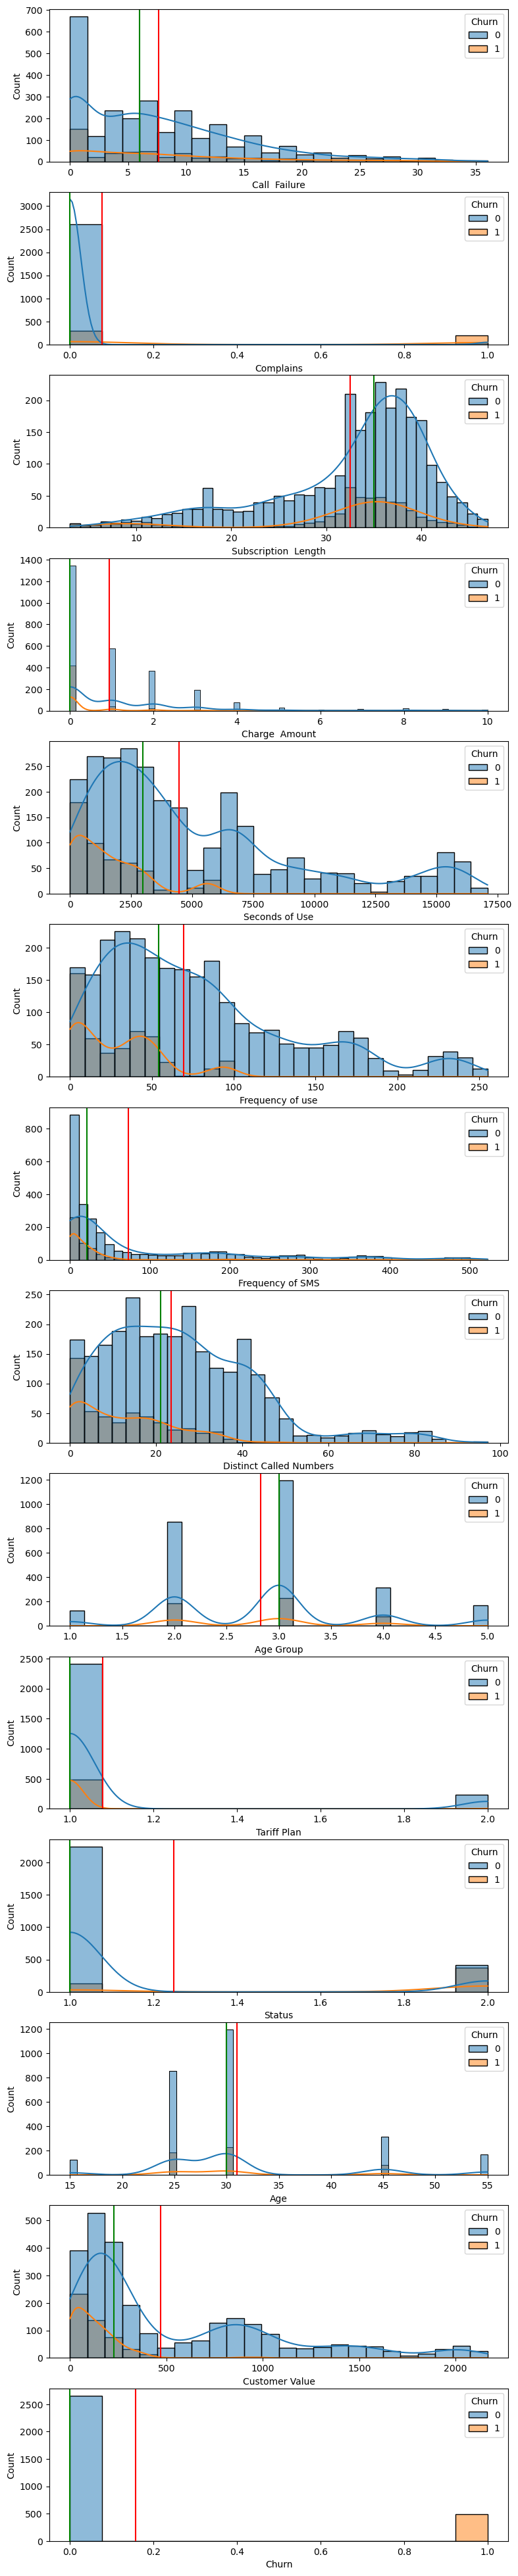

In [15]:
fig,ax = plt.subplots(nrows=len(num_cols),ncols=1,figsize=(9,50))

for i in num_cols:
    sns.histplot(data=data,x=i,ax=ax[num_cols.index(i)],kde=True,legend=True,hue='Churn')
    ax[num_cols.index(i)].axvline(data[i].mean(),color="red",label=f"Mean: {data[i].mean():.2f}")
    ax[num_cols.index(i)].axvline(data[i].median(),color='green',label=f"Median: {data[i].median():.2f}")
    # ax[num_cols.index(i)].set_title(f'Frequency dist for {i}')

# Looking at the distributions, we can see that most of the features are positively skewed (median < mean) with one exception as the Subscription Length 

## Bivariate Analysis

In [23]:
data

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.980,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.640,0


[['Call  Failure',
  'Complains',
  'Subscription  Length',
  'Charge  Amount',
  'Seconds of Use',
  'Frequency of use',
  'Frequency of SMS',
  'Distinct Called Numbers',
  'Age Group',
  'Tariff Plan',
  'Status',
  'Age',
  'Customer Value',
  'Churn']]

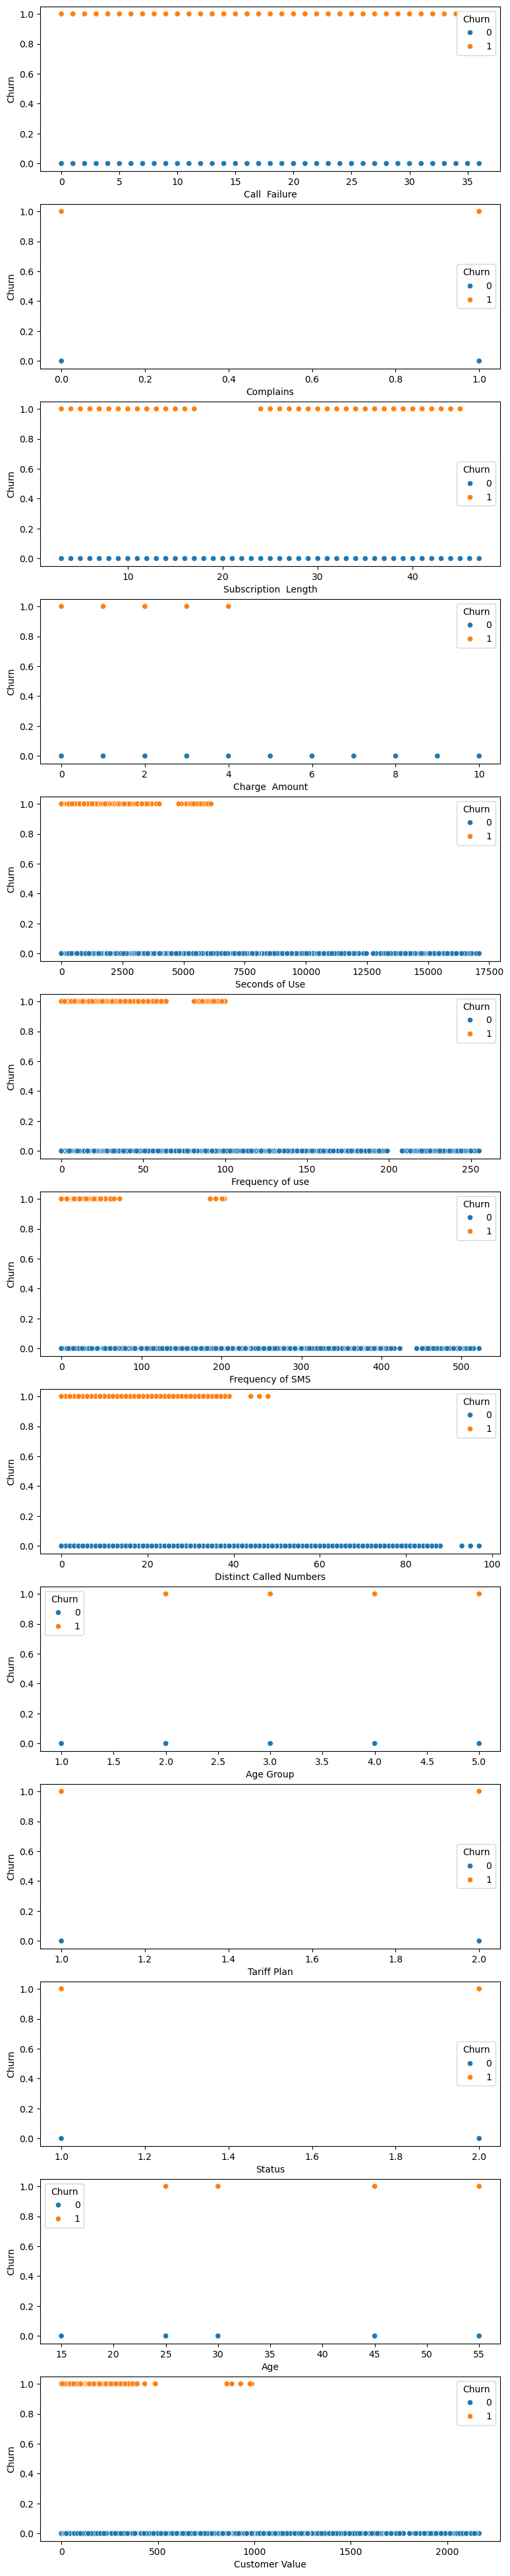

In [ ]:
fig,ax = plt.subplots(nrows=len(num_cols[:-1]),ncols=1,figsize=(9,50))

for i in num_cols[:-1]:
    sns.scatterplot(data=data,x=i,y='Churn',ax=ax[num_cols.index(i)],hue='Churn')


In [ ]:
cat_cols = ['Call  Failure','Complains','Subscription  Length','Charge  Amount','Seconds of Use','Age Group','Tariff Plan','Status','Age']

for i in cat_cols:
    print(pd.DataFrame(data.groupby(by=i).agg(Churned=('Churn','sum'),Total=('Churn','size'),Avg=('Churn','mean'))).sort_values(by=['Churned','Total'],ascending=False))
    print("-------------------------")

# This gives a lot of insights related to Churn Pattern when grouped by various Categorical columns


               Churned  Total       Avg
Call  Failure                          
0                  140    702  0.199430
5                   45    244  0.184426
6                   24    161  0.149068
7                   23    166  0.138554
8                   21    156  0.134615
9                   21    149  0.140940
2                   19    137  0.138686
4                   19    133  0.142857
3                   18    141  0.127660
11                  16    125  0.128000
10                  16    124  0.129032
14                  15     85  0.176471
1                   12    121  0.099174
12                  12     97  0.123711
13                  11     99  0.111111
16                  11     67  0.164179
18                   9     53  0.169811
23                   7     25  0.280000
15                   6     69  0.086957
20                   6     37  0.162162
28                   6     17  0.352941
17                   4     45  0.088889
19                   4     33  0.121212


## Multivariate Analysis

<Axes: >

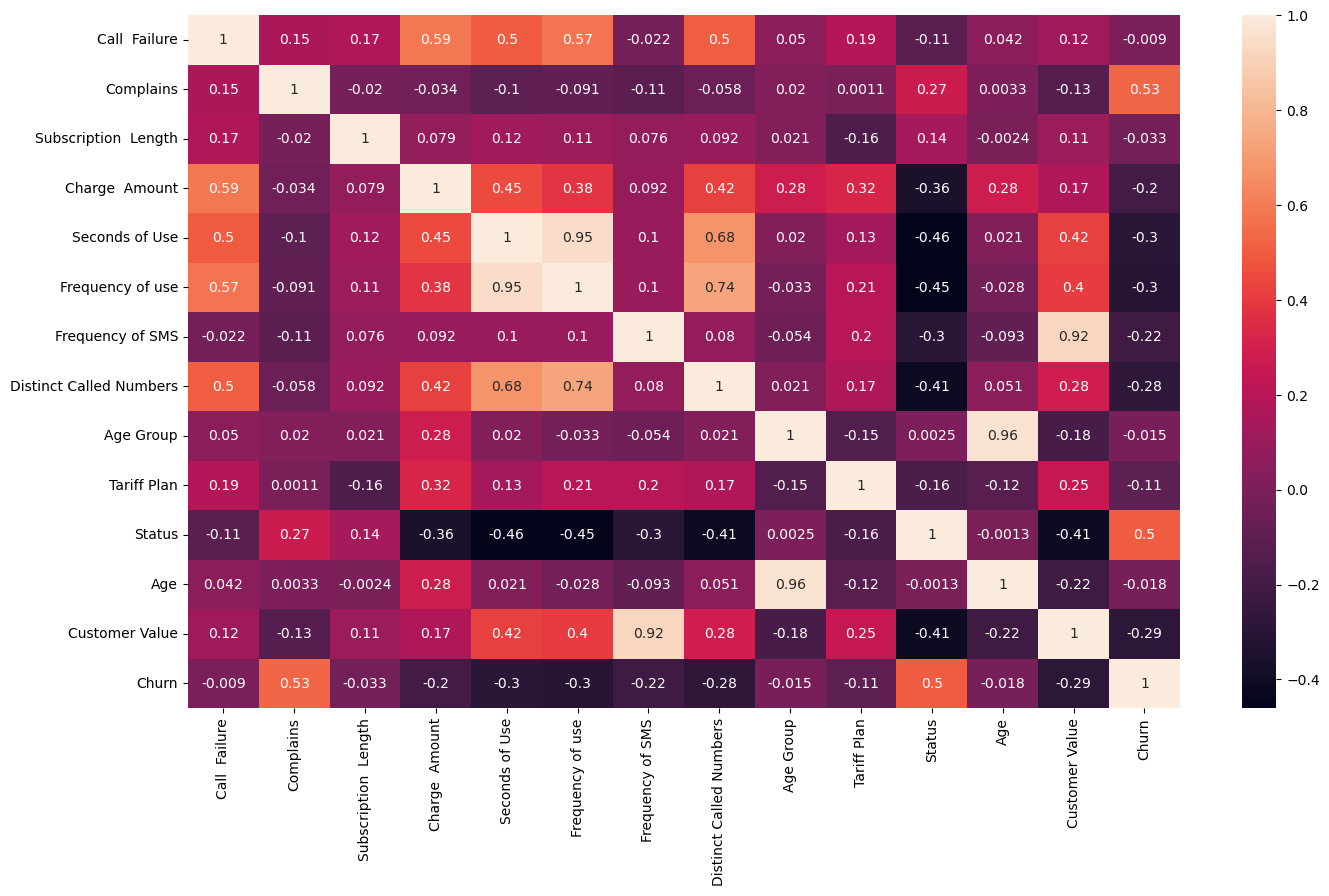

In [ ]:
fig,ax = plt.subplots(figsize=(16,9))

sns.heatmap(data.corr(),annot=True)

# Most of the features are not that correlated with the target apart from Complains.

# Preprocessing and Feature Engineering

In [17]:
data.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


**How to proceed with Preprocessing for all features**

**Feature Engineering**  
There are some set of features that correlate quite well
- Usage = sqrt((Seconds of Use)*(Frequency of Use)),
- Userbase = sqrt((Distinct Call Numbers)*(Customer Value))  
(Will combine these features using Composite Feature method)

**Scaling and Transformation**  
- 'Call  Failure' > Using log(1+x) transformation as Mean > Median
- 'Complains' > It is a binary categorical variable
- 'Subscription  Length' > Will be using sqrt(x) transformation as values are non negative and differ quite a lot
- 'Charge  Amount' > This is like a categorical variable but differ quite a lot so will use logbase10 transformation
- 'Frequency of SMS' > Will use log(1+x) scaling
- 'Age Group' > Will delete this feature as correlation is quite high with Age
- 'Tariff Plan' > Categorical variable will convert into 0-1
- 'Status' > Same as that of Tariff plan
- 'Age' > It is like a categorical variable so maybe can use Standard Scaler
- 'Usage' > Will use log transformation
- 'Userbase' > Will use log transformation
- 'Churn' > No need to do anything

## Feature Engineering

In [84]:
data2 = data.copy()

In [ ]:
data2.rename(columns={'Charge  Amount':'Charge Amount'},inplace=True)
data2.rename(columns={'Call  Failure':'Call Failure'},inplace=True)
data2.rename(columns={'Subscription  Length':'Subscription Length'},inplace=True)

In [86]:
data2['Usage'] = data2['Seconds of Use']*data2['Frequency of use']
data2['Usage'] = data2['Usage'].apply(lambda x: np.sqrt(x))
data2.drop(columns=['Seconds of Use','Frequency of use'],inplace=True)


In [87]:
data2['Userbase'] = data2['Distinct Called Numbers']*data2['Customer Value']
data2['Userbase'] = data2['Userbase'].apply(lambda x: np.sqrt(x))
data2.drop(columns=['Distinct Called Numbers','Customer Value'],inplace=True)

In [88]:
data2.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Frequency of SMS,Age Group,Tariff Plan,Status,Age,Churn,Usage,Userbase
0,8,0,38,0,5,3,1,1,30,0,557.018851,57.964472
1,0,0,39,0,7,2,1,2,25,0,39.874804,13.569819
2,10,0,37,0,359,3,1,1,30,0,383.640457,192.032497
3,10,0,38,0,1,1,1,1,15,0,526.372492,91.655333
4,3,0,38,0,2,1,1,1,15,0,372.550668,69.365445


In [89]:
data2['Usage'] = data2['Usage'].apply(lambda x: float('{:.2f}'.format(x)))
data2['Userbase'] = data2['Userbase'].apply(lambda x: float('{:.2f}'.format(x)))

In [90]:
data2.columns

Index(['Call Failure', 'Complains', 'Subscription  Length', 'Charge Amount',
       'Frequency of SMS', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Churn', 'Usage', 'Userbase'],
      dtype='object')

In [92]:
data2 = data2[['Call Failure','Complains','Subscription Length','Charge Amount','Frequency of SMS','Tariff Plan','Status','Age','Usage','Userbase','Churn']]

In [93]:
data2

,Call Failure,Complains,Subscription Length,Charge Amount,Frequency of SMS,Tariff Plan,Status,Age,Usage,Userbase,Churn
0,8,0,38,0,5,1,1,30,557.02,57.96,0
1,0,0,39,0,7,1,2,25,39.87,13.57,0
2,10,0,37,0,359,1,1,30,383.64,192.03,0
3,10,0,38,0,1,1,1,15,526.37,91.66,0
4,3,0,38,0,2,1,1,15,372.55,69.37,0
...,...,...,...,...,...,...,...,...,...,...,...
3096,17,0,17,1,80,1,1,55,1278.65,104.74,0
3097,13,0,18,4,38,1,1,30,401.26,76.72,0
3099,8,1,11,2,7,1,1,30,211.66,30.10,1
3123,26,0,38,9,8,2,1,55,1031.14,87.65,0


<Axes: xlabel='Userbase', ylabel='Count'>

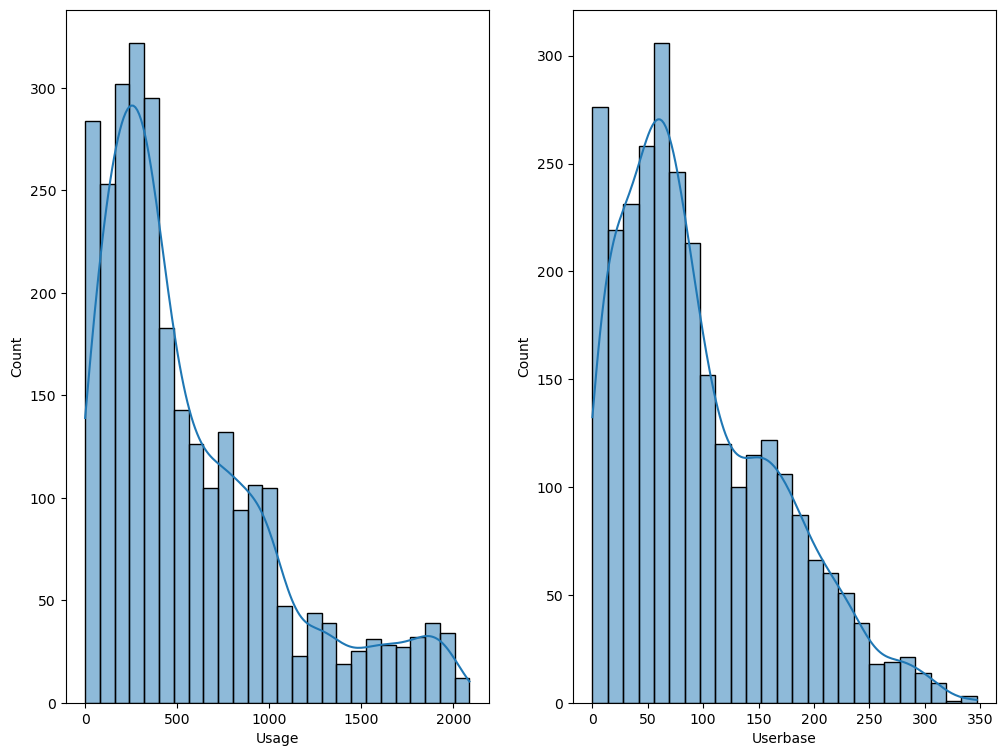

In [62]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,9))

sns.histplot(data=data2,x='Usage',kde=True,ax=ax[0])  
sns.histplot(data=data2,x='Userbase',kde=True,ax=ax[1])

As both of them follow positively skewed distribution, there will also use log(1+x) transformation

## Transformation

In [81]:
data2.columns

Index(['Call Failure', 'Complains', 'Charge Amount', 'Frequency of SMS',
       'Tariff Plan', 'Status', 'Age', 'Usage', 'Userbase', 'Churn'],
      dtype='object')

In [94]:
data2['Call Failure'] = data2['Call Failure'].apply(lambda x: float('{:.2f}'.format(np.log10(1+x))))
data2['Subscription Length'] = data2['Subscription Length'].apply(lambda x: float('{:.2f}'.format(np.sqrt(x))))
data2['Charge Amount'] = data2['Charge Amount'].apply(lambda x: float('{:.2f}'.format(np.log10(1+x))))
data2['Frequency of SMS'] = data2['Frequency of SMS'].apply(lambda x: float('{:.2f}'.format(np.log10(1+x))))
data2['Tariff Plan'] = data2['Tariff Plan'].apply(lambda x: x-1)
data2['Status'] = data2['Status'].apply(lambda x: x-1)
data2['Usage'] = data2['Usage'].apply(lambda x: float('{:.2f}'.format(np.log10(1+x))))
data2['Userbase'] = data2['Userbase'].apply(lambda x: float('{:.2f}'.format(np.log10(1+x))))

In [95]:
data2

,Call Failure,Complains,Subscription Length,Charge Amount,Frequency of SMS,Tariff Plan,Status,Age,Usage,Userbase,Churn
0,0.95,0,6.16,0.00,0.78,0,0,30,2.75,1.77,0
1,0.00,0,6.24,0.00,0.90,0,1,25,1.61,1.16,0
2,1.04,0,6.08,0.00,2.56,0,0,30,2.59,2.29,0
3,1.04,0,6.16,0.00,0.30,0,0,15,2.72,1.97,0
4,0.60,0,6.16,0.00,0.48,0,0,15,2.57,1.85,0
...,...,...,...,...,...,...,...,...,...,...,...
3096,1.26,0,4.12,0.30,1.91,0,0,55,3.11,2.02,0
3097,1.15,0,4.24,0.70,1.59,0,0,30,2.60,1.89,0
3099,0.95,1,3.32,0.48,0.90,0,0,30,2.33,1.49,1
3123,1.43,0,6.16,1.00,0.95,1,0,55,3.01,1.95,0


In [97]:
scaler = StandardScaler()

In [102]:
feature = data2['Age'].values.reshape(-1,1)
data2['Age'] = scaler.fit_transform(feature).ravel()

In [ ]:
data2['Age'] = data2['Age'].apply(lambda x: '{:.2f}'.format(x))
data2['Age'] = data2['Age'].astype('float')


ValueError: Unknown format code 'f' for object of type 'str'

In [130]:
data2.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Frequency of SMS,Tariff Plan,Status,Age,Usage,Userbase,Churn
0,0.95,0,6.16,0.0,0.78,0,0,-0.12,2.75,1.77,0
1,0.00,0,6.24,0.0,0.90,0,1,-0.69,1.61,1.16,0
2,1.04,0,6.08,0.0,2.56,0,0,-0.12,2.59,2.29,0
3,1.04,0,6.16,0.0,0.30,0,0,-1.81,2.72,1.97,0
4,0.60,0,6.16,0.0,0.48,0,0,-1.81,2.57,1.85,0


In [111]:
data2

,Call Failure,Complains,Subscription Length,Charge Amount,Frequency of SMS,Tariff Plan,Status,Age,Usage,Userbase,Churn
0,0.95,0,6.16,0.00,0.78,0,0,-0.12,2.75,1.77,0
1,0.00,0,6.24,0.00,0.90,0,1,-0.69,1.61,1.16,0
2,1.04,0,6.08,0.00,2.56,0,0,-0.12,2.59,2.29,0
3,1.04,0,6.16,0.00,0.30,0,0,-1.81,2.72,1.97,0
4,0.60,0,6.16,0.00,0.48,0,0,-1.81,2.57,1.85,0
...,...,...,...,...,...,...,...,...,...,...,...
3096,1.26,0,4.12,0.30,1.91,0,0,2.70,3.11,2.02,0
3097,1.15,0,4.24,0.70,1.59,0,0,-0.12,2.60,1.89,0
3099,0.95,1,3.32,0.48,0.90,0,0,-0.12,2.33,1.49,1
3123,1.43,0,6.16,1.00,0.95,1,0,2.70,3.01,1.95,0


In [114]:
data2.columns.values

array(['Call Failure', 'Complains', 'Subscription Length',
       'Charge Amount', 'Frequency of SMS', 'Tariff Plan', 'Status',
       'Age', 'Usage', 'Userbase', 'Churn'], dtype=object)

In [117]:
list(data2.columns.values)

['Call Failure',
 'Complains',
 'Subscription Length',
 'Charge Amount',
 'Frequency of SMS',
 'Tariff Plan',
 'Status',
 'Age',
 'Usage',
 'Userbase',
 'Churn']

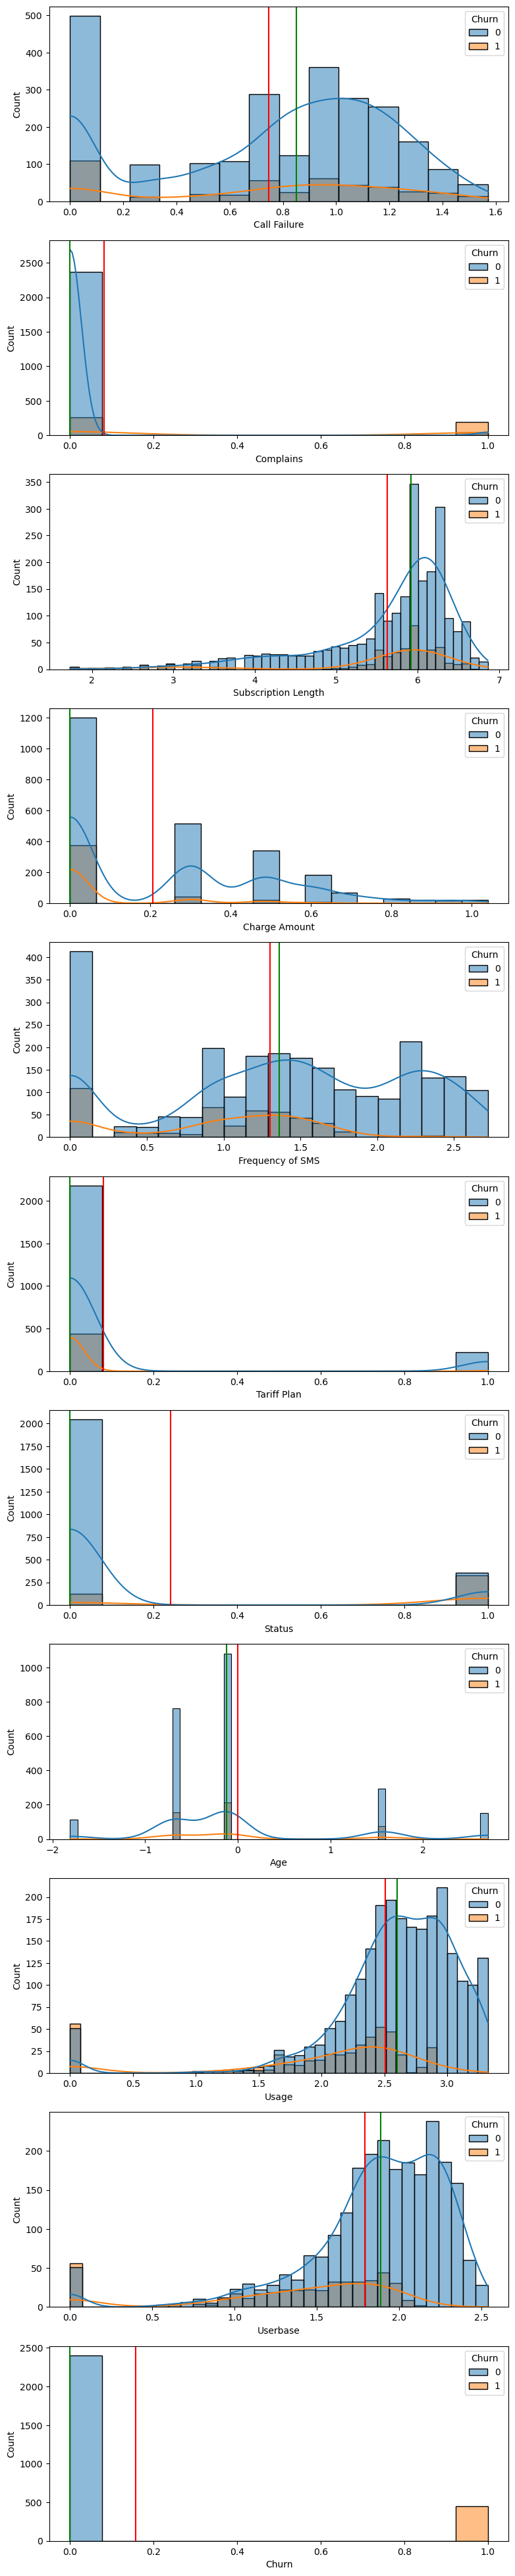

In [131]:
num_cols2 = list(data2.columns.values)

fig,ax = plt.subplots(nrows=len(num_cols2),ncols=1,figsize=(9,50))

for i in num_cols2:
    sns.histplot(data=data2,x=i,ax=ax[num_cols2.index(i)],kde=True,legend=True,hue='Churn')
    ax[num_cols2.index(i)].axvline(data2[i].mean(),color="red",label=f"Mean: {data2[i].mean():.2f}")
    ax[num_cols2.index(i)].axvline(data2[i].median(),color='green',label=f"Median: {data2[i].median():.2f}")
    # ax[num_cols.index(i)].set_title(f'Frequency dist for {i}')